# transformations and matrices

You might be familiar with terms in the digital arts space like *scaling* and *rotating*. In software like Adobe Photoshop or GIMP, these are *transformations* you can apply to images to stretch, spin and distort them. 

<img src="images/transformations_and_matrices/transformations-star.png">

As an example, consider the transformations applied to the star in the image above. You could easily draw the untransformed star, in the top left, using points in py5.

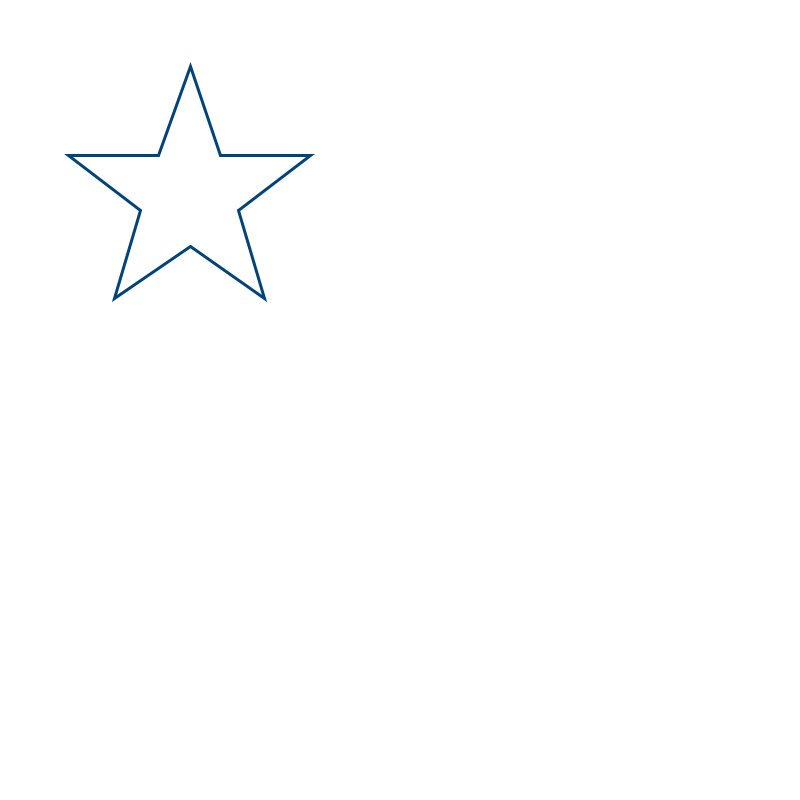

In [1]:
size(800,800)
background('#FFFFFF')
stroke_weight(3)
stroke('#004379')
    
begin_shape()
vertex(190,66)
vertex(220,155)
vertex(310,155)
vertex(238,210)
vertex(264,298)
vertex(190,246)
vertex(114,298)
vertex(140,210)
vertex(68,155)
vertex(158,155)
end_shape(CLOSE)

What if you wanted to draw one of the transformed versions, like the one in the lower right, which has been both scaled and rotated? Calculating the differences in these many vertices requires the use of a *matrix* (which is *matrices* in plural... just like *vertex* becomes *vertices*). 

## matrices in mathematics

In mathematics, a *matrix* is just a rectangular array of values - that is, it has both rows and columns. For example, this is a *two-by-three* (two rows, three columns) matrix, storing six values:

$\begin{bmatrix} 2 & 5 & 12 \\ 19 & 9 & 7 \end{bmatrix}$

Digital images are essentially just grids of pixels, with both rows and columns, so matrices are extremely useful when manipulating computer graphics (though they're also used in mathematics and other sciences). We'll be learning how these work from a mathematical perspective first, and then you'll be introduced to the matrix functions in py5 - so things will get much easier. If all the math seems a little advanced, you can read through without implementing it in your own code, and you'll still understand a little better when we get to the next section, *matrices in py5*. 

To help you out in visualizing the coordinates in your sketch, you'll want to use the following two images, <a href="images/transformations_and_matrices/grid.png">grid.png</a> and <a href="images/transformations_and_matrices/grid-overlay.png">grid-overlay.png</a>. You can save them in the same folder as your sketch, or reference them by their full URL. 

<img src="images/transformations_and_matrices/grid.png">

<img src="images/transformations_and_matrices/grid-overlay.png">

Let's start with some simple code - setting up our sketch with a grid background and drawing a `rect()` on it. We'll use variables to determine its x and y position, as well as its width and height.

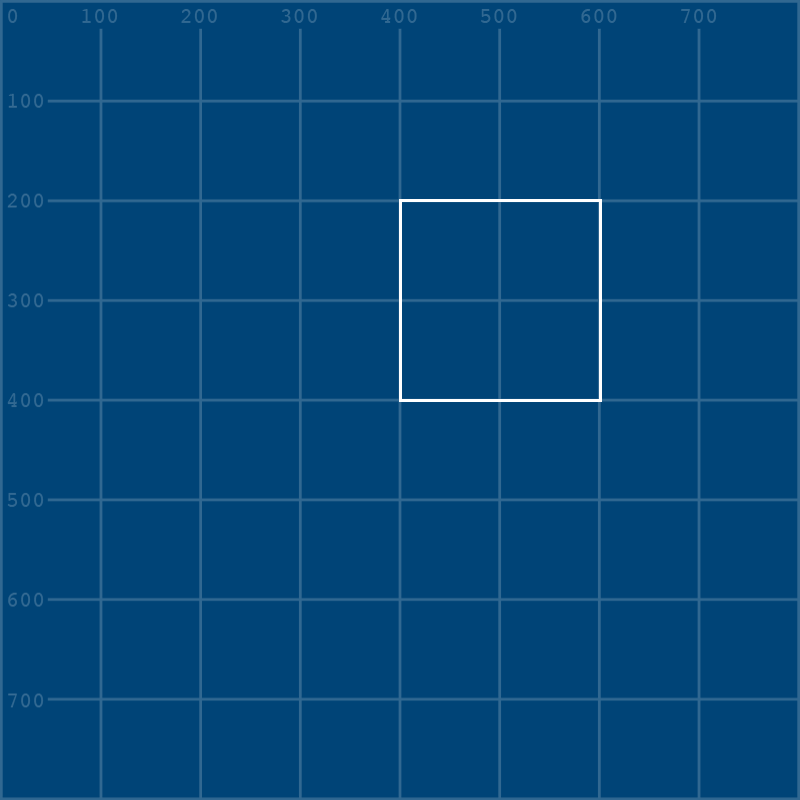

In [2]:
size(800, 800)
grid = load_image('images/transformations_and_matrices/grid.png')
image(grid, 0,0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

rect(x,y, w,h)

You'll notice we've used semicolons (;) between some of our variables. In py5 (and regular Python), this is the same as moving to a new line, so this can be a way to arrange your variables and make them easier to understand as a set.

We've used a simple `rect()` above to draw our square, but matrices work on individual vertices, which we aren't currently using. Let's quickly rewrite our `rect()` as a `quad()`.

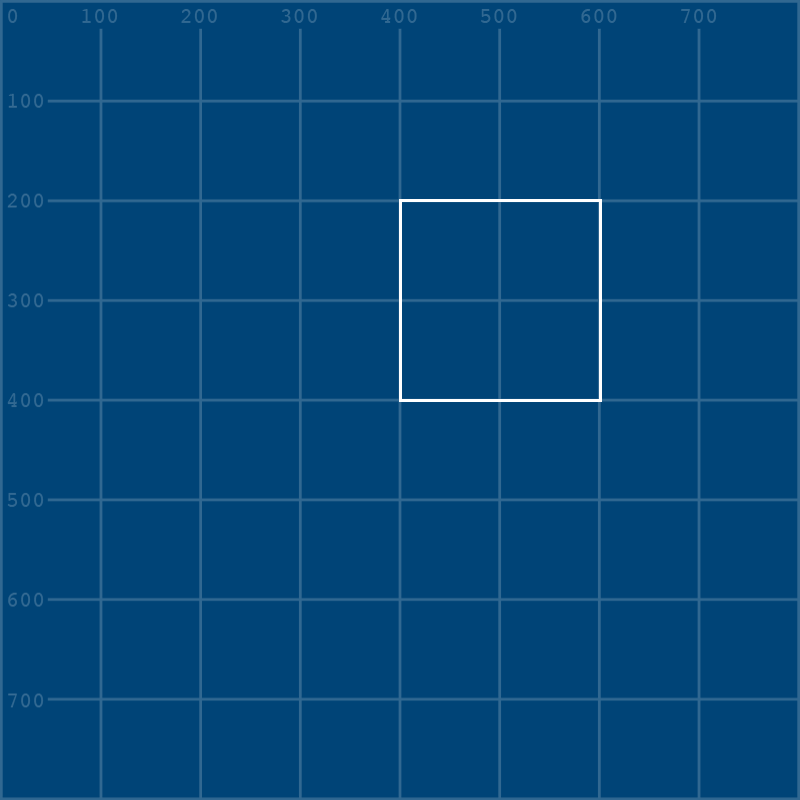

In [3]:
size(800, 800)
grid = load_image('images/transformations_and_matrices/grid.png')
image(grid, 0,0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

# rect(x,y, w,h)
quad(
  x, y, # top left vertex
  x, y+h, # bottom left vertex
  x+w, y+h, # bottom right vertex
  x+w, y # top right vertex
)

<img src="images/transformations_and_matrices/transformations-matrices-quad.png">

Even though this is now using vertices, we haven't had to do any difficult math ourselves, because we've simply added the height and width values (*h* and *w*) that we declared. We're ready to use our first transformation.

## translate

Translation is a very simple type of transformation - in our case, it will simply move this square in a direction of our choosing. There are ways to do this without matrices, but it will serve as a good introduction.

Notice that all four vertices are reliant on the x and y values - so these are the only values we'll have to alter to move the entire square. If we want to represent it as a mathematical matrix, it might look like...

$\begin{bmatrix} x \\ y \end{bmatrix}$

Translating a matrix is as simple as adding or subtracting the values of another matrix. This is done by adding and subtracting the values in each row on the matrix. We'll make two new variables, *a* and *b*, to represent the translation on the x and y axis. 

$\begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} x + a \\ y + b \end{bmatrix}$

Let's add these values into our code, and add another quad (with a different color) to represent how far it moved.

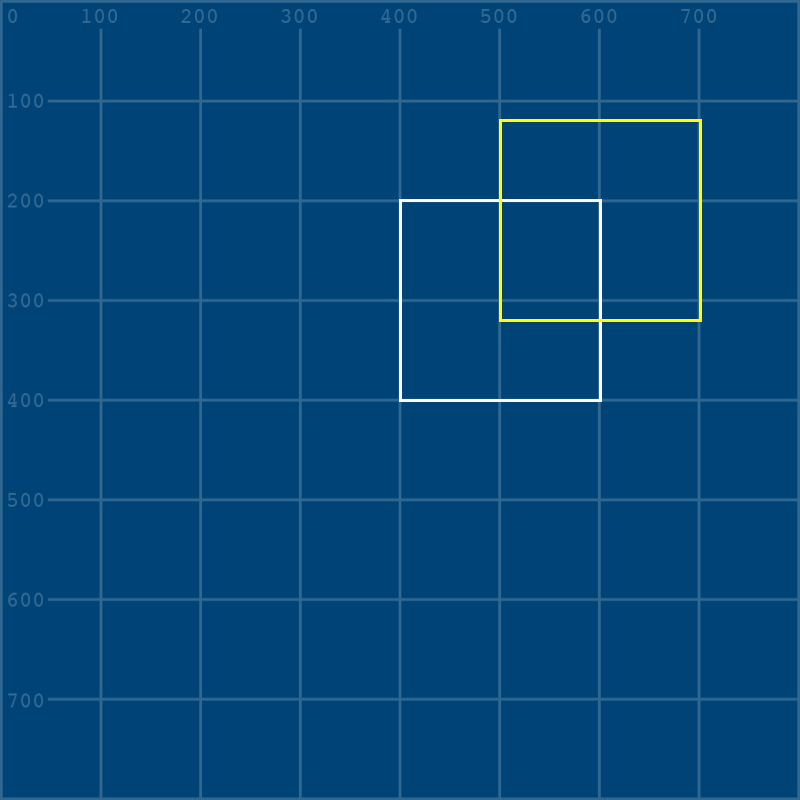

In [4]:
size(800, 800)
grid = load_image('images/transformations_and_matrices/grid.png')
image(grid, 0,0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

quad(
  x, y, # top left vertex
  x, y+h, # bottom left vertex
  x+w, y+h, # bottom right vertex
  x+w, y # top right vertex
)

a = 100; b = -80
stroke('#FFFF00')
quad(
  x+a, y+b,
  x+a, y+h+b,
  x+w+a, y+h+b,
  x+w+a, y+b
)

<img src="images/transformations_and_matrices/transformations-matrices-translate.png">

With all the actual values in place, this whole operation can be represented by this matrix:

$\begin{bmatrix} 400 \\ 200 \end{bmatrix} + \begin{bmatrix} 100 \\ -80 \end{bmatrix} = \begin{bmatrix} 400 + 100 \\ 200 + -80 \end{bmatrix}$

## scale

To scale a shape up or down, you multiply one matrix by another. 

$\begin{bmatrix} x \\ y \end{bmatrix} \times \begin{bmatrix} a & b \\ c & d \end{bmatrix}$

... which becomes the very complex looking ...

$\begin{bmatrix} x \\ y \end{bmatrix} \times \begin{bmatrix} a & b \\ c & d \end{bmatrix} = \begin{bmatrix} (x * a) + (y * b) \\ (x * c) + (y * d) \end{bmatrix}$

Actually, the above formula (depending on the values in a, b, c and d) can perform scaling operations, but also reflection (mirroring), squeezing, rotating, or skewing/shearing a shape. This is quite complex, and is a great example of when matrices start to do a lot of heavy lifting. In the world of matrices, *a* above represents the width, and *d* represents the height. As an example, this matrix has both a and d represented by 0.5, so it will make the square half as large:

$\begin{bmatrix} 400 \\ 200 \end{bmatrix} \times \begin{bmatrix} 0.5 & 0 \\ 0 & 0.5 \end{bmatrix} = \begin{bmatrix} (400 * 0.5) + (200 * 0) \\ (400 * 0) + (200 * 0.5) \end{bmatrix}$

Let's actually implement this in our code and see how it works.

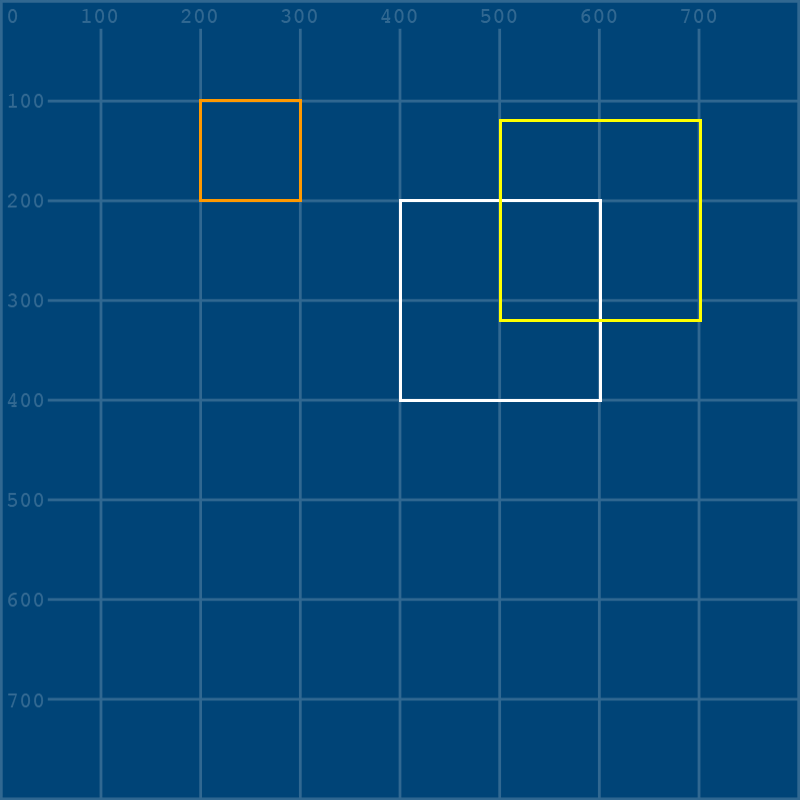

In [5]:
size(800, 800)
grid = load_image('images/transformations_and_matrices/grid.png')
image(grid, 0,0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

quad(
  x, y, # top left vertex
  x, y+h, # bottom left vertex
  x+w, y+h, # bottom right vertex
  x+w, y # top right vertex
)

a = 100; b = -80
stroke('#FFFF00')
quad(
  x+a, y+b,
  x+a, y+h+b,
  x+w+a, y+h+b,
  x+w+a, y+b
)

a = 0.5; b = 0
c = 0; d = 0.5
stroke('#FF9900')
quad(
  x*a + y*b,         x*c + y*d,
  x*a + (y+h)*b,     x*c + (y+h)*d,
  (x+w)*a + (y+h)*b, (x+w)*c + (y+h)*d,
  (x+w)*a + y*b,     (x+w)*c + y*d
)

<img src="images/transformations_and_matrices/transformations-matrices-scale.png">

The resulting orange square is half the size, sure, but it's also moved to the left. Why is that? 

We can discover this by adding in that second grid overlay image from earlier. We'll also be using a third and fourth argument when we place this image, to make it half as large. (Thankfully, we don't need to write another matrix for this!) I've added it just before this last orange square, so we can get a good look...

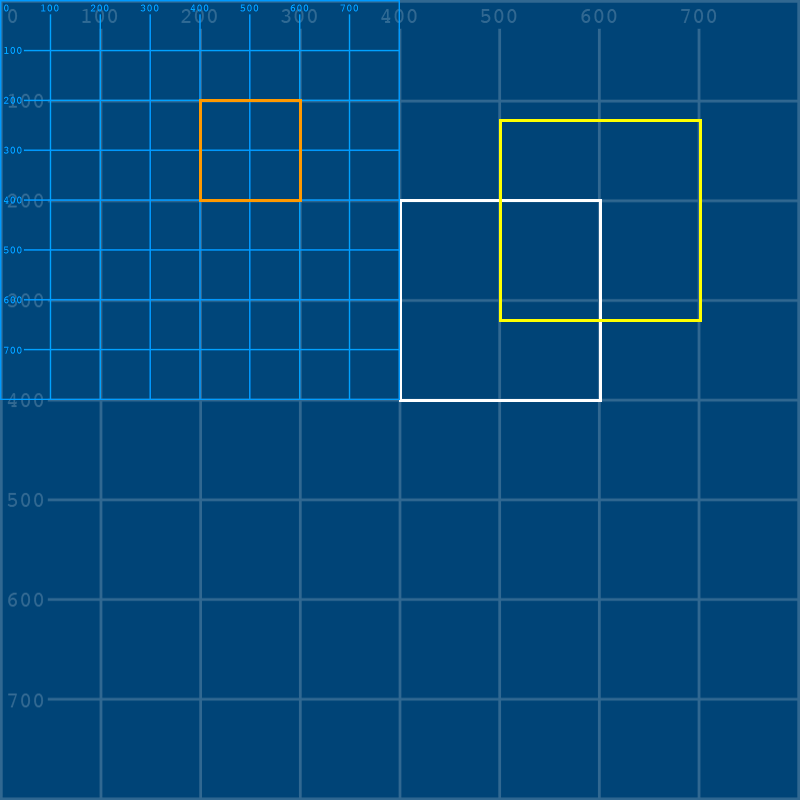

In [7]:
size(800, 800)
grid = load_image('images/transformations_and_matrices/grid.png')
image(grid, 0,0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

quad(
  x, y, # top left vertex
  x, y+h, # bottom left vertex
  x+w, y+h, # bottom right vertex
  x+w, y # top right vertex
)

a = 100; b = -80
stroke('#FFFF00')
quad(
  x+a, y+b,
  x+a, y+h+b,
  x+w+a, y+h+b,
  x+w+a, y+b
)

gridoverlay = load_image('images/transformations_and_matrices/grid-overlay.png')
image(gridoverlay, 0,0, 800/2,800/2)

a = 0.5; b = 0
c = 0; d = 0.5
stroke('#FF9900')
quad(
  x*a + y*b,         x*c + y*d,
  x*a + (y+h)*b,     x*c + (y+h)*d,
  (x+w)*a + (y+h)*b, (x+w)*c + (y+h)*d,
  (x+w)*a + y*b,     (x+w)*c + y*d
)

<img src="images/transformations_and_matrices/transformations-matrices-scale-grid-overlay.png">

See what happened? The grid has become half its original size, but is still placed at 0,0. In the exact same way, using a matrix to scale the shape will also move it in space, so that its relationship to that 0,0 point is still the same.

Of course, since scaling has both a height and width value, it doesn't have to be proportionate to the original shape. Here's a version with scaling of 0.3, 1.8 instead of 0.5, 0.5.

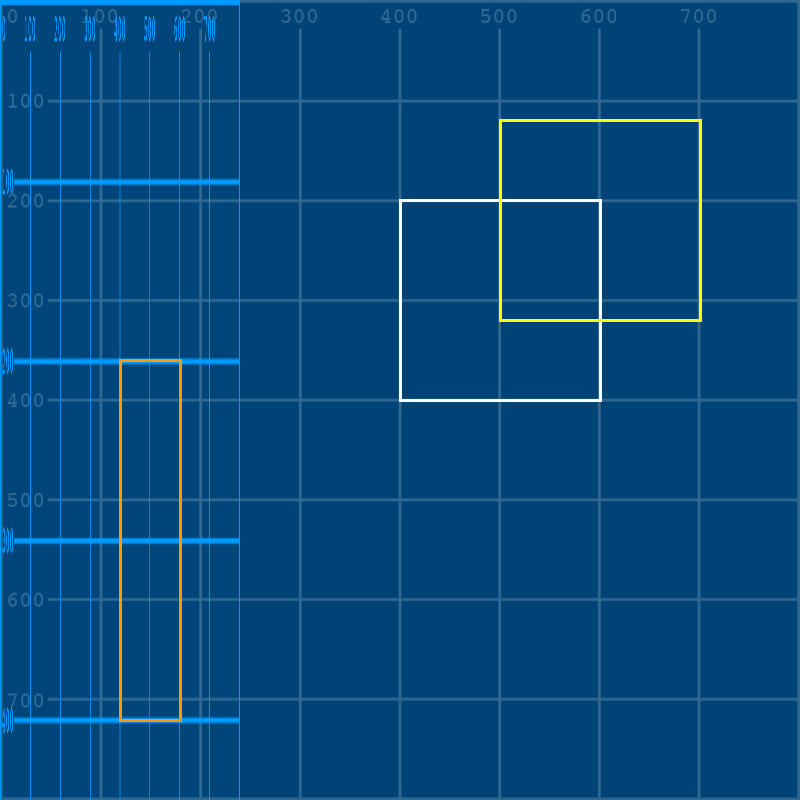

In [8]:
size(800, 800)
grid = load_image('images/transformations_and_matrices/grid.png')
image(grid, 0,0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

quad(
  x, y, # top left vertex
  x, y+h, # bottom left vertex
  x+w, y+h, # bottom right vertex
  x+w, y # top right vertex
)

a = 100; b = -80
stroke('#FFFF00')
quad(
  x+a, y+b,
  x+a, y+h+b,
  x+w+a, y+h+b,
  x+w+a, y+b
)

gridoverlay = load_image('images/transformations_and_matrices/grid-overlay.png')
# image(gridoverlay, 0,0, 800*0.3,800*1.8)

a = 0.3; b = 0
c = 0;   d = 1.8
stroke('#FF9900')
quad(
  x*a + y*b,         x*c + y*d,
  x*a + (y+h)*b,     x*c + (y+h)*d,
  (x+w)*a + (y+h)*b, (x+w)*c + (y+h)*d,
  (x+w)*a + y*b,     (x+w)*c + y*d
)

<img src="images/transformations_and_matrices/transformations-matrices-scale-disproportionate.png">

I've commented out the grid above, but given it the same proportional values. If you uncomment that line, you can see how it deforms, which might make this even clearer.

<img src="images/transformations_and_matrices/transformations-matrices-scale-disproportionate-overlay.png">

## reflect

Reflecting a shape is the same as mirroring it - you will have a version that is the opposite orientation, whether horizontally or vertically. This is done via matrices by setting one axis to a negative value, and the other to 1. 

Just like scaling, this is done relative to the 0,0 point. As an example, this code will add a red square that is a perfect horizontal reflection of our original, but you'll find it very unsatisfying:

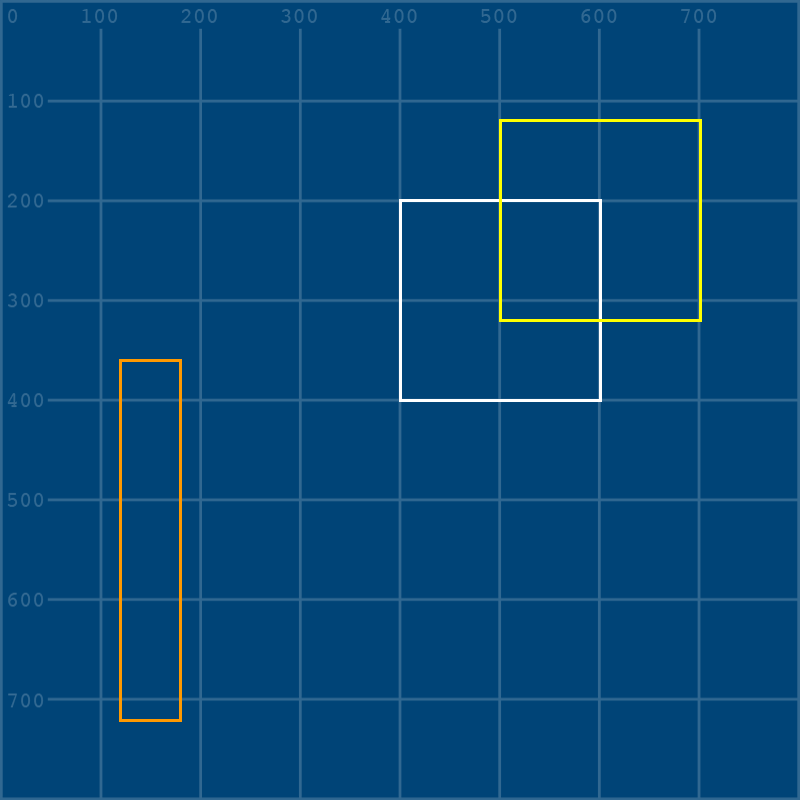

In [9]:
size(800, 800)
grid = load_image('images/transformations_and_matrices/grid.png')
image(grid, 0,0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

quad(
  x, y, # top left vertex
  x, y+h, # bottom left vertex
  x+w, y+h, # bottom right vertex
  x+w, y # top right vertex
)

a = 100; b = -80
stroke('#FFFF00')
quad(
  x+a, y+b,
  x+a, y+h+b,
  x+w+a, y+h+b,
  x+w+a, y+b
)

gridoverlay = load_image('images/transformations_and_matrices/grid-overlay.png')
# image(gridoverlay, 0,0, 800*0.3,800*1.8)

a = 0.3; b = 0
c = 0;   d = 1.8
stroke('#FF9900')
quad(
  x*a + y*b,         x*c + y*d,
  x*a + (y+h)*b,     x*c + (y+h)*d,
  (x+w)*a + (y+h)*b, (x+w)*c + (y+h)*d,
  (x+w)*a + y*b,     (x+w)*c + y*d
)

a = -1; b = 0
c = 0;  d = 1
stroke('#FF0000')
quad(
  x*a + y*b,         x*c + y*d,
  x*a + (y+h)*b,     x*c + (y+h)*d,
  (x+w)*a + (y+h)*b, (x+w)*c + (y+h)*d,
  (x+w)*a + y*b,     (x+w)*c + y*d
)

Where's the red square? Well, we've given it a width of -200 (so, 200 in the opposite direction) and a starting position of -400. Even though it's perfectly mirrored, it's far off the left side of the screen!

<img src="images/transformations_and_matrices/transformations-matrices-reflect.png">

## rotate

Rotational transformations use trigonometric functions - `cos()` and `sin()`. You aren't expected to know how these work by heart, but remember that py5 uses *radians* rather than *degrees*, so some additional math may be required to get where you need to go. Let's say you want to rotate something by 45 degrees. 360 degrees is equal to $\pi \times 2$ radians, so you can do a little math inside of py5...

```
full_radius = PI * 2
one_degree = full_radius / 360
forty_five_degrees = one_degree * 45
```

... or you can just "know" (magically) that 45 degrees is around 0.785 radians. 

$\begin{bmatrix} 400 \\ 200 \end{bmatrix} \times \begin{bmatrix} cos(0.785) & -sin(0.785) \\ sin(0.785) & cos(0.785)\end{bmatrix}$

Either way, here's how you rotate our square with your own 45 degree matrix. Our code is getting pretty long, so I've left out everything but the white square and our new rotated square in the example below.

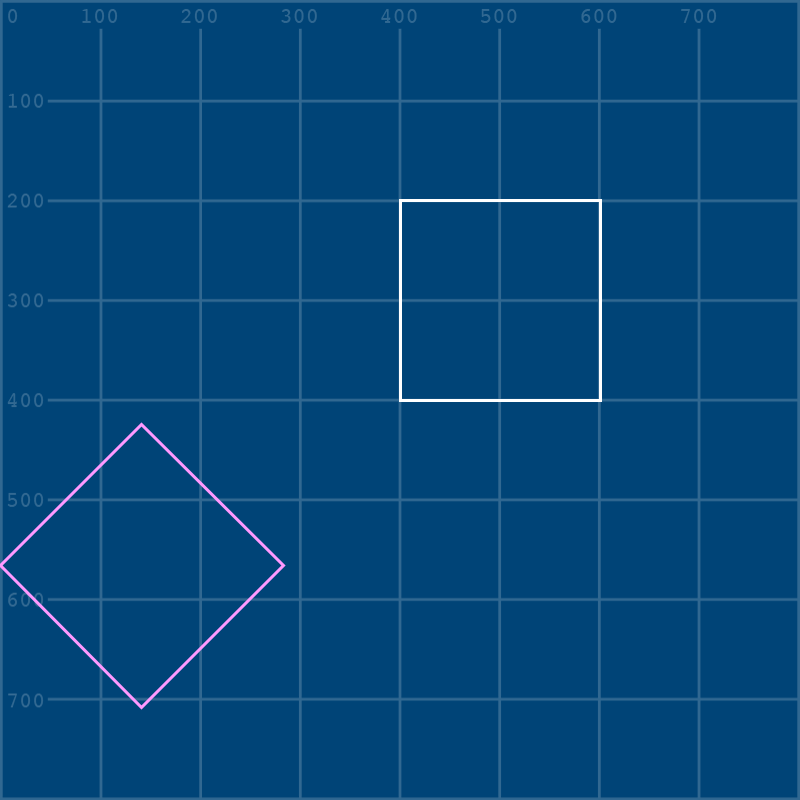

In [12]:
size(800, 800)
grid = load_image('images/transformations_and_matrices/grid.png')
image(grid, 0,0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

# You can use this forty_five_degrees variable instead of 0.785 below, if you want.
# They're almost the same!
full_radius = PI * 2
one_degree = full_radius / 360
forty_five_degrees = one_degree * 45

x = 400; y = 200
w = 200; h = 200

quad(
  x, y, # top left vertex
  x, y+h, # bottom left vertex
  x+w, y+h, # bottom right vertex
  x+w, y # top right vertex
)

a = cos(0.785); b = -sin(0.785)
c = sin(0.785); d = cos(0.785)
stroke('#FF99FF')
quad(
  x*a + y*b,         x*c + y*d,
  x*a + (y+h)*b,     x*c + (y+h)*d,
  (x+w)*a + (y+h)*b, (x+w)*c + (y+h)*d,
  (x+w)*a + y*b,     (x+w)*c + y*d
)

Why did it end up all the way down in the corner? All that matrix math above has put the top left corner at around 141, 424 in its own matrix-rotated local space.

<img src="images/transformations_and_matrices/transformations-matrices-rotate.png">

With the grid placed back in and rotated with it, you can see this a bit more easily (though it's gotten complex very quickly):

<img src="images/transformations_and_matrices/transformations-matrices-rotate-overlay.png">

Let's look at once last matrix type before we get into how to do them more easily in py5.

## shear

Shearing a shape is similar to *skewing* it in graphics programs. Essentially, it is slanted along the horizontal or vertical axis, but the actual area or volume of the shape remains the same. This is the formula for a horizontal shear of whatever strength you give *b*:

$\begin{bmatrix} x \\ y \end{bmatrix} \times \begin{bmatrix} 1 & b \\ 0 & 1 \end{bmatrix}$

For a vertical shear, that value goes in *c* instead:

$\begin{bmatrix} x \\ y \end{bmatrix} \times \begin{bmatrix} 1 & 0 \\ c & 1 \end{bmatrix}$

In practice, here's another square, sheared vertically using a value of 0.4.

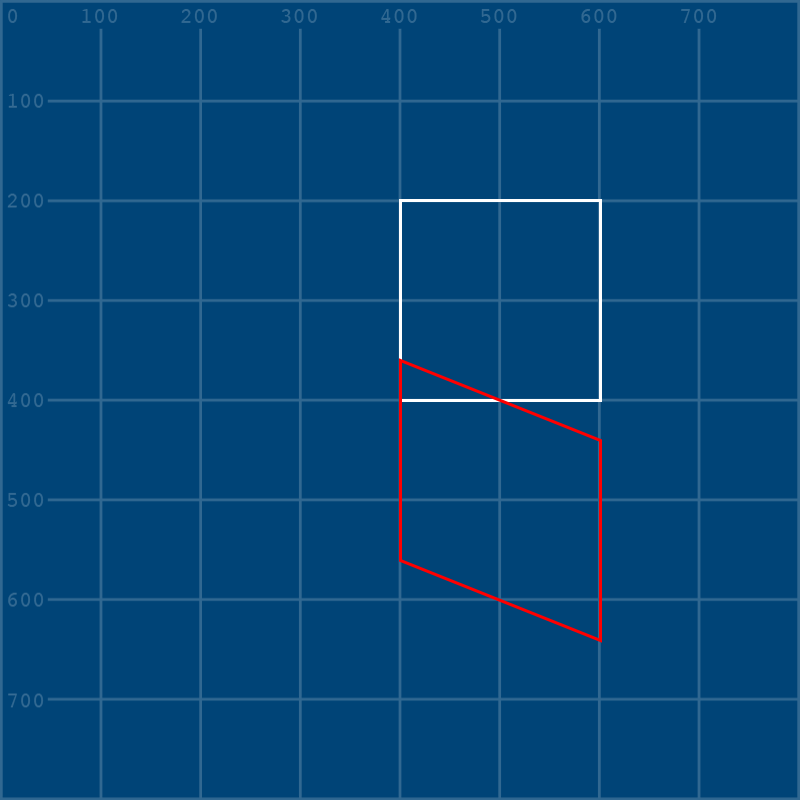

In [13]:
size(800, 800)
grid = load_image('images/transformations_and_matrices/grid.png')
image(grid, 0,0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

quad(
  x, y, # top left vertex
  x, y+h, # bottom left vertex
  x+w, y+h, # bottom right vertex
  x+w, y # top right vertex
)

a = 1;   b = 0
c = 0.4; d = 1
stroke('#FF0000')
quad(
  x*a + y*b,         x*c + y*d,
  x*a + (y+h)*b,     x*c + (y+h)*d,
  (x+w)*a + (y+h)*b, (x+w)*c + (y+h)*d,
  (x+w)*a + y*b,     (x+w)*c + y*d
)

Just to make things more clear and yet more complicated, you can see here how its entire grid space has sheared upwards, and where its top-left corner ends up:

<img src="images/transformations_and_matrices/transformations-matrices-shear.png">

You now know more things than you ever cared to know about matrices. Note that we've only used relatively simple (yes, really) two-by-two matrices here; Python has an entire library, called [NumPy](https://numpy.org/), that will make it easier to use larger matrices (among other things). However, for now, we can simply move on to the built-in py5 functions that handle all this math for us.

## matrices in py5

We'll be using our <a href="images/transformations_and_matrices/grid.png">grid.png</a> and <a href="images/transformations_and_matrices/grid-overlay.png">grid-overlay.png</a> images again. You can save them in the same folder as your sketch, or reference them by their full URL. 

At first, our code will look very familiar. We don't need to use a `quad()` here unless you're particularly keen to, since py5 will handle each matrix itself, without us needing to directly access any vertices!

In [ ]:
size(800, 800)

# Loading in both images here, but we're only using one at first
grid = load_image('images/transformations_and_matrices/grid.png')
gridoverlay = load_image('images/transformations_and_matrices/grid-overlay.png')
image(grid, 0,0)

no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

rect(x,y, w,h)

Time for a brand new function! `translate(x, y)` *translates* subsequent shapes by the values you give it. Remember all the math we did to manually push a yellow square 100 pixels right and 80 pixels up? Let's use `translate()` to do it this time - and to better understand what's happening here, add in a red square at 0,0 below it all.

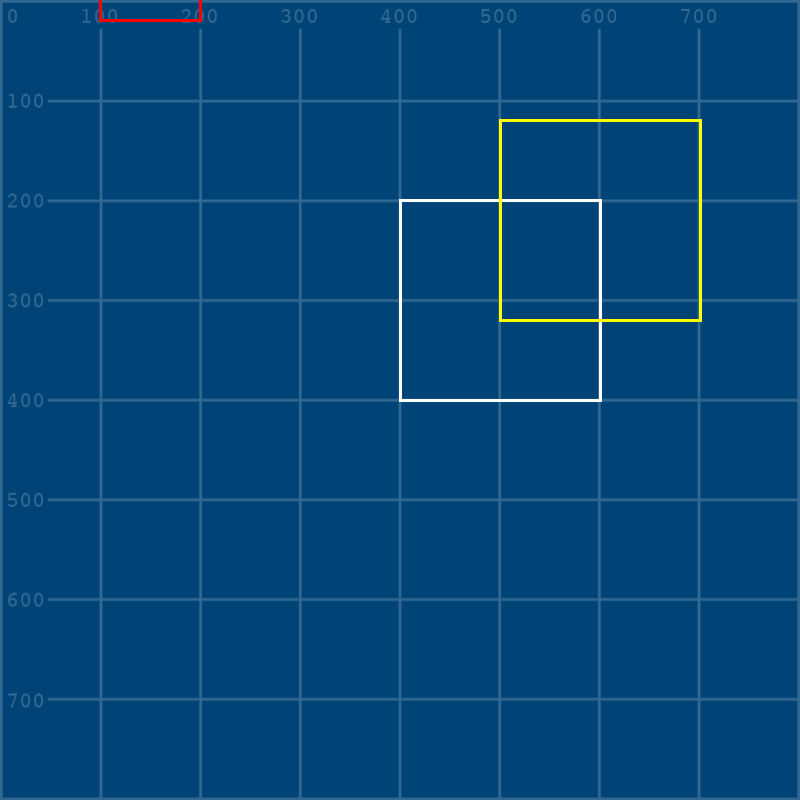

In [17]:
size(800, 800)

# Loading in both images here, but we're only using one at first
grid = load_image('images/transformations_and_matrices/grid.png')
gridoverlay = load_image('images/transformations_and_matrices/grid-overlay.png')
image(grid, 0,0)

no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

rect(x,y, w,h)

# The translate() function makes things so easy...
translate(100,-80)

stroke('#FFFF00')
rect(x,y, w,h)

# So where will this square end up?
stroke('#FF0000')
rect(0,0, 100,100)

<img src="images/transformations_and_matrices/red-square.png">

What happened here? The shape itself wasn't moved - rather, the whole coordinates system shifted! We can add in our grid overlay to make this more clear.

<img src="images/transformations_and_matrices/grid-overlay-again.png">

You may realize that this means that when you've translated that square by 100, -80, if you want the coordinates system to return to "normal", you have to undo it in some way. Of course, you could throw in a `translate(-100,80)` to simply reverse the translation, but that gets messy quickly. Even better, you can isolate this matrix into its own *stack*. When a matrix is isolated, you can simply tell py5 that you're done with it, and return things to normal. 

To do this, we'll use two new functions that wrap everything we want translated - `push_matrix()` and `pop_matrix()`.

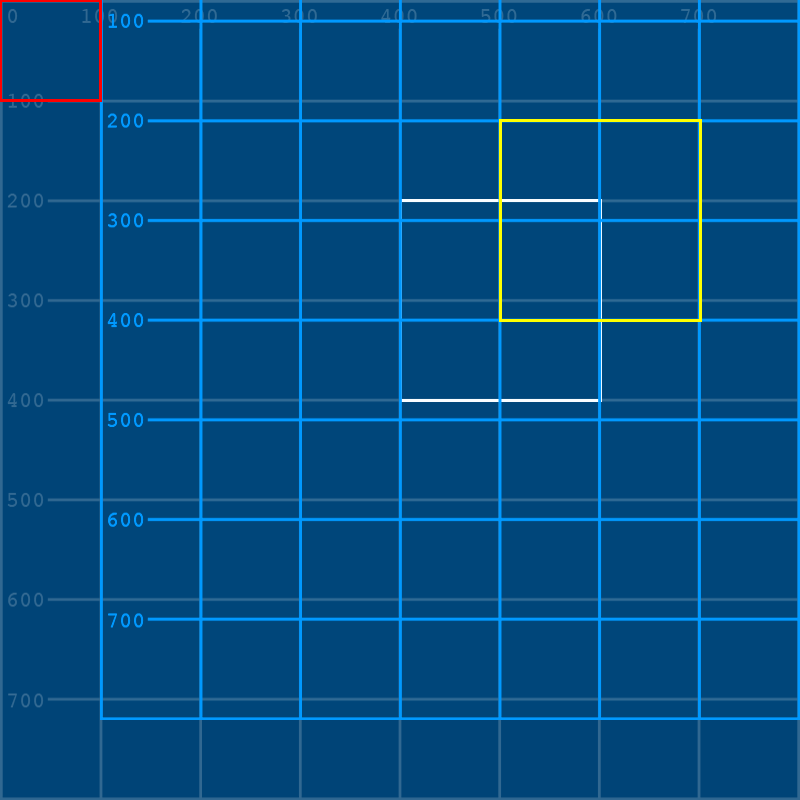

In [19]:
size(800, 800)

# Loading in both images here, but we're only using one at first
grid = load_image('images/transformations_and_matrices/grid.png')
gridoverlay = load_image('images/transformations_and_matrices/grid-overlay.png')
image(grid, 0,0)

no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

rect(x,y, w,h)

push_matrix() # Starting this new matrix

translate(100,-80)
image(gridoverlay,0,0)
stroke('#FFFF00')
rect(x,y, w,h)

pop_matrix() # Ending this matrix

# So where will this square end up now that it's *outside* of the matrix?
stroke('#FF0000')
rect(0,0, 100,100)

<img src="images/transformations_and_matrices/transformations-functions-translate-matrix.png">

Being able to isolate matrices like this is really useful when you begin drawing handfuls of different elements on screen at once. If you were drawing a face, but you needed all the features on the face to shift together, you could wrap the whole thing in a matrix and translate it without worrying about moving other elements of your sketch. In addition to `translate()`, py5 has functions to `rotate()`, `scale()`, `shear_x()` and `shear_y()`, all of which work very similarly to the matrices we used above.

You can even combine them all into one big, exciting mess!

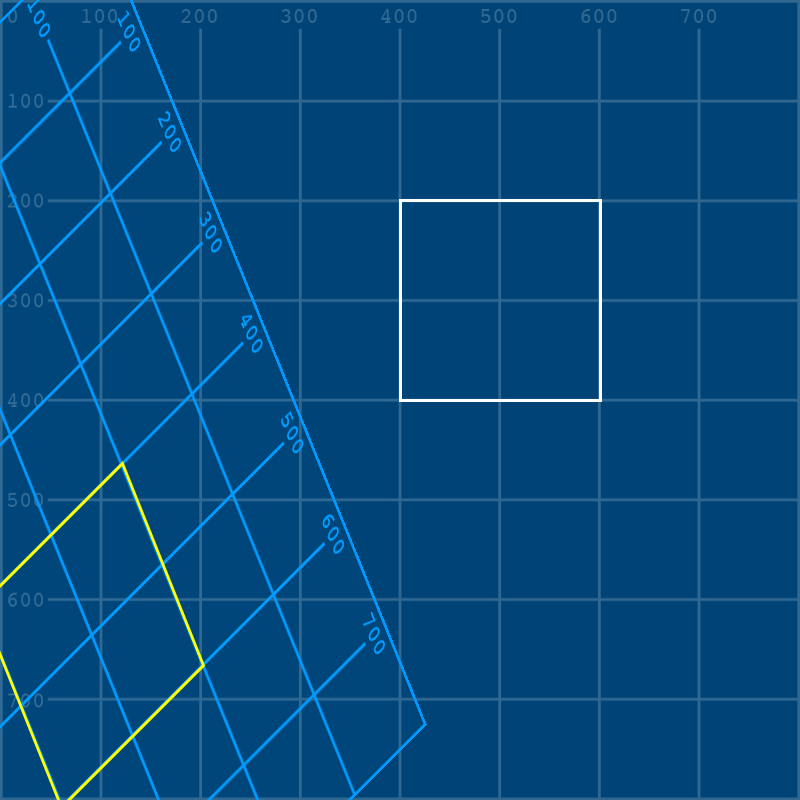

In [21]:
size(800, 800)

# Loading in both images here, but we're only using one at first
grid = load_image('images/transformations_and_matrices/grid.png')
gridoverlay = load_image('images/transformations_and_matrices/grid-overlay.png')
image(grid, 0,0)

no_fill()
stroke('#FFFFFF')
stroke_weight(3)

x = 400; y = 200
w = 200; h = 200

rect(x,y, w,h)

push_matrix() # Starting this new matrix

# ... let's just see what happens
translate(100,-80)
rotate(0.785)
shear_y(0.4)

image(gridoverlay,0,0)
stroke('#FFFF00')
rect(x,y, w,h)

pop_matrix() # Ending this matrix

<img src="images/transformations_and_matrices/mess.png">

Some of these transformations can be really powerful when used in the right places. For example, if you want to lay a hundred tiles using loops in py5, a lot of the math involved will be positioning each tile in relation to the last one. Using `translate()` each time the code is executed to move the coordinates system, this becomes a simple task. 

## analog clock task

Using what we've learned about py5's transformation and matrix tools, let's create a working analog clock that displays the current time. Don't worry - we'll be using the py5 functions for this one, not manually calculating our matrices!

In order to animate our clock, we'll have to take advantage of two built-in functions that define the behavior of whole blocks of code: `setup()` and `draw()`. Other tutorials do not always use these functions - coding in py5 without using these is referred to as *static* mode, since the sketches it creates will have still (static) visuals. Py5bot is set up to run these sorts of sketches by default. A static sketch might begin with some code like this, to set up the various unchanging qualities of the sketch:

```
size(600, 600)
no_fill()
stroke('#FFFFFF')
```

It's no surprise, then, that this is the sort of code you execute in a `setup()` function. Like many other types of code blocks (such as those you would use for *if* statements), indenting is used to keep all this `setup()` code running together. In some development environments (like on this documentation website), you may also need to include a `run_sketch()` line at the bottom of your sketch. This line will be included in all code snippets here, so that they can be run using live code.

In [ ]:
def setup():
    size(600, 600)
    frame_rate(1)
    no_fill()
    stroke('#FFFFFF')
    
def draw():
    background('#004477')
    
run_sketch()

Any code in that block following `def setup():` is run once, when the sketch begins.

This `setup()` function becomes very powerful when you use it with `draw()`. Unlike `setup()`, which is run once, `draw()` is run every frame! By default, sketches run at 60 frames per second, but this number may reduce if a lot of heavy-duty animation is running on screen. Here, by using the `frame_rate()` function, we've reduced this to one frame per second, which will work perfectly for our seconds hand.

You'll notice that we've placed our `background()` function inside of `draw()`, too. This ensures that at the start of each new frame, whatever we have on the screen already will be hidden by this new background. 

To create our clock, we'll definitely need to know the current time. Thankfully, py5 has a series of functions related to this. Add them into your code, and you'll quickly see what they do. We'll be setting three new variables (for our hour, minute and seconds counters) and then turning them into strings of text with `str()` to display them in the console.

In [5]:
def setup():
    size(600, 600)
    frame_rate(1)
    no_fill()
    stroke('#FFFFFF')
    
def draw():
    background('#004477')
    h = hour()
    m = minute()
    s = second()
    print( str(h) + ':' + str(m) + ':' + str(s) )
    
run_sketch()

14:10:55
14:10:56


With each new frame (which takes one second to advance), you'll receive a printout of the current time, in hours, minutes and seconds. Of course, if you wanted to make a *digital* clock, it would now be a simple matter of using py5's text functions to draw this printout in the sketch window. For an analog clock, we'll have to go a little farther.

Let's go ahead and add some visuals into our sketch - starting with the clock face itself and the hour hand. To make things a little easier, we'll be starting everything off with a `translate()` function that moves *0 , 0* to the middle of the screen. This means that as we start rotating things around the center of the clock, we'll simply have to worry about them rotating around this starting point.

In [ ]:
def setup():
    size(600, 600)
    frame_rate(1)
    no_fill()
    stroke('#FFFFFF')
    
def draw():
    background('#004477')
    h = hour()
    m = minute()
    s = second()
    # print( str(h) + ':' + str(m) + ':' + str(s) )
    
    # Translating to the center of the sketch window...
    translate(width/2, height/2)
    
    # Clock face
    stroke_weight(3)
    ellipse(0, 0, 350, 350)
    
    # Hour hand
    stroke_weight(10)
    line(0, 0, 100, 0)
    
run_sketch()

Right now, the hour hand is pointing to the right side of the clock face, at zero *radians* of rotation. This is also where `arc()` functions begin, and where py5, in general, starts calculating its radians. If you remember, when we're discussing rotations around a circle, the entire radius can be represented by $\pi$ multiplied by 2. So, to start our hour hand at the top of the clock (rotating it counter-clockwise by one quarter of the circle's radius), we'll want to use $\pi$ divided by 2. In fact, since we're rotating counter-clockwise, we'll want to make this value negative. Just like its $\pi$ variable, `PI`, py5 actually includes a variable for half of $\pi$, `HALF_PI`.

In [7]:
def setup():
    size(600, 600)
    frame_rate(1)
    no_fill()
    stroke('#FFFFFF')
    
def draw():
    background('#004477')
    h = hour()
    m = minute()
    s = second()
    # print( str(h) + ':' + str(m) + ':' + str(s) )
    
    # Translating to the center of the sketch window...
    translate(width/2, height/2)
    
    # Clock face
    stroke_weight(3)
    ellipse(0, 0, 350, 350)
    
    # Hour hand
    rotate(-HALF_PI) # Rotated counterclockwise by HALF_PI
    stroke_weight(10)
    line(0, 0, 100, 0)
    
run_sketch()

In addition to `PI` and `HALF_PI`, there's a built-in variable for $\pi \times 2$ as well. This is `TAU`, a term coined only as recently as 2010 to describe the "full turn" of $\pi \times 2$. So, if there are 12 hours on your clock, a single hour is represented by `TAU` divided by 12. Great news - we have the current hour, so we can incorporate this value into our `rotate()` function to put the hour hand in the right place!

In [11]:
def setup():
    size(600, 600)
    frame_rate(1)
    no_fill()
    stroke('#FFFFFF')
    
def draw():
    background('#004477')
    h = hour()
    m = minute()
    s = second()
    # print( str(h) + ':' + str(m) + ':' + str(s) )
    
    # Translating to the center of the sketch window...
    translate(width/2, height/2)
    
    # Clock face
    stroke_weight(3)
    ellipse(0, 0, 350, 350)
    
    # Hour hand
    rotate(-HALF_PI) # Rotated counterclockwise by HALF_PI
    rotate(TAU / 12 * h) # ... and then rotated to the current hour!
    stroke_weight(10)
    line(0, 0, 100, 0)
    
run_sketch()

It's time to add in the minute and second hands. It could be a good idea to wrap each of your hands between the `push_matrix()` and `pop_matrix()` functions, so that the rotation of one doesn't impact the rotations of the others. You can also uncomment that `print()` function again at any time, so you can compare your clock (and how it advances) with the current time. 

You may even find it helpful to make a new variable representing a single hour's movement - `TAU / 12` - and further divide it to know how far your minute and second hands should move!